In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

In [2]:
red['class'] = 0
white['class'] = 1

In [3]:
wine = pd.concat([red, white])
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [4]:
data = wine.drop(['class'], axis=1).values
target = wine['class'].values

In [5]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=42)

In [6]:
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9993746530912755 0.9932651588065449


In [7]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9996632649507319 0.9948052861479233


In [8]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.00558984 0.04743723 0.59790922 0.00224294 0.11471675 0.00196247
 0.16657925 0.01380417 0.00630691 0.01063102 0.03079491 0.00202529]


In [9]:
# Hyper parameter tuning
params = {'max_depth': range(6, 12, 2),
          'min_samples_split': range(2, 30, 2)
}
gs = GridSearchCV(GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)
print(gs.best_params_)
print(gs.best_score_)
print(gs.score(test_input, test_target))

{'max_depth': 6, 'min_samples_split': 26}
0.9903794328866514
0.9884615384615385


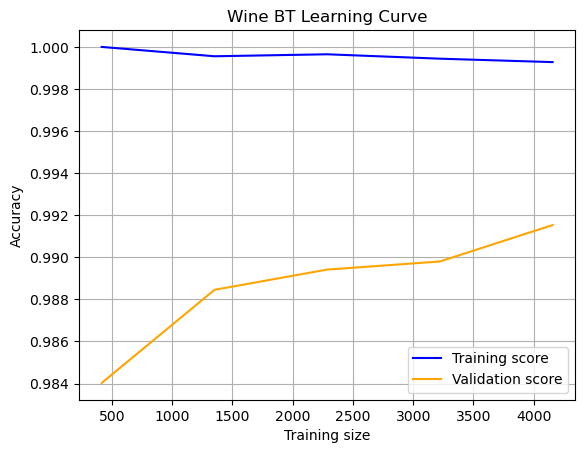

In [12]:
train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingClassifier(max_depth=5, learning_rate=0.1, n_estimators=50, min_samples_split=26),
    train_input,
    train_target,
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.grid()
plt.title('Wine BT Learning Curve', loc='center')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.plot(train_sizes, train_scores_mean, color='blue', label="Training score")
plt.plot(train_sizes, test_scores_mean, color='orange', label="Validation score")
plt.legend(['Training score', 'Validation score'])
plt.savefig('graph\\wine_bt_lc.png', format='png')
plt.show()

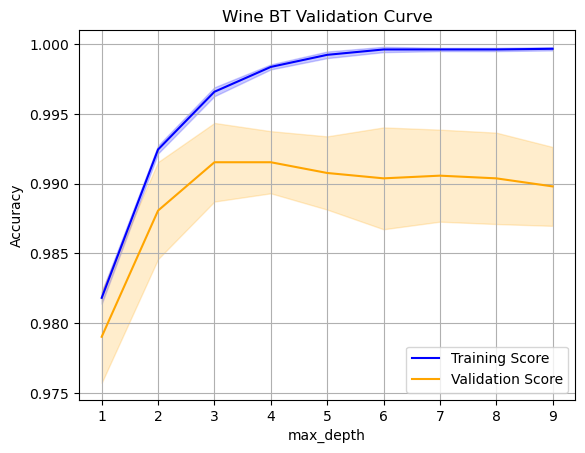

In [13]:
param_name = "max_depth"
param_range = range(1, 10, 1)

train_scores, valid_scores = validation_curve(
    GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, min_samples_split=26), train_input, train_target, param_name=param_name,
    param_range=param_range, cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', label='Training Score')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.2, color='blue')

plt.plot(param_range, test_mean, color='orange', label='Validation Score')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.2, color='orange')

plt.grid()
plt.title('Wine BT Validation Curve', loc='center')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.savefig('graph\\wine_bt_vc.png', format='png')
plt.show()